## Réseaux de neurones convolutionnels 

Maintenant qu'on a vu comment fonctionnait une convolution, on va entraîner nos premiers réseaux de neurones convolutionnels avec Keras


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Télécharger le dataset cifar 10 en utilisant le module datasets de keras

In [2]:
from tensorflow.keras.datasets import cifar10

# Télécharger le dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Afficher la forme des données d'entraînement et de test pour vérification
print("Forme des données d'entraînement :", x_train.shape)
print("Forme des données de test :", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 58s 0us/step
Forme des données d'entraînement : (50000, 32, 32, 3)
Forme des données de test : (10000, 32, 32, 3)


Récupérer le jeu de train et de test dans des variables train et test

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Afficher une ou deux images du jeu de train avec matplotlib 

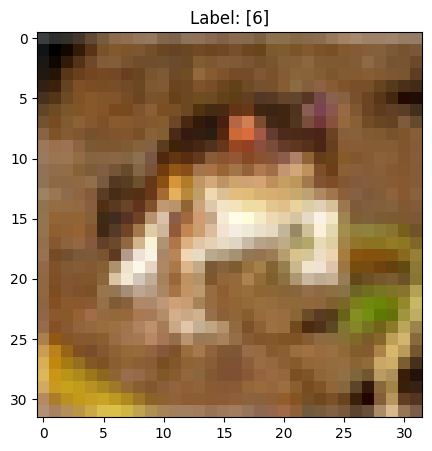

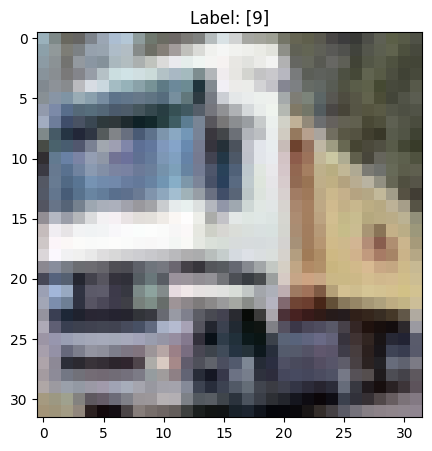

In [13]:
import matplotlib.pyplot as plt

# Afficher la première image du jeu de train
plt.figure(figsize=(5, 5))
plt.imshow(x_train[0])
plt.title(f'Label: {y_train[0]}')
plt.show()

# Afficher la deuxième image du jeu de train
plt.figure(figsize=(5, 5))
plt.imshow(x_train[1])
plt.title(f'Label: {y_train[1]}')
plt.show()

Si les données prennent des valeurs en 0 et 255 faire une normalisation des données

In [9]:
# Normaliser les données d'entraînement et de test
train_images_normalized = x_train.astype('float32') / 255.0
test_images_normalized = x_test.astype('float32') / 255.0

Créer un premier réseau de neurones convolutionnel à trois couches 
- Une couche convolutionnelle avec 32 neurones et une activation relu
- Une couche Dense ave 300 neurones relu
- Une couche Dense finale à spécifier vous même

Il faudra notamment penser à spécifier input_shape pour la première couche

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

# Initialiser le modèle séquentiel
model = Sequential()

# Ajouter une couche convolutionnelle avec 32 neurones et une activation relu
# N'oubliez pas de spécifier l'input_shape pour la première couche
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Aplatir les données pour la transition entre les couches convolutionnelles et denses
model.add(Flatten())

# Ajouter une couche Dense avec 300 neurones et une activation relu
model.add(Dense(300, activation='relu'))

# Ajouter une couche Dense finale
# Vous devez spécifier le nombre de neurones dans cette couche en fonction du nombre de classes de votre problème
# Par exemple, pour un problème de classification avec 10 classes, utilisez 10 neurones et une activation 'softmax'
model.add(Dense(10, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

C:\Users\Nathan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     8,640,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,644,206 (32.98 MB)

 Trainable params: 8,644,206 (32.98 MB)

 Non-trainable params: 0 (0.00 B)

Compiler le modèle avec la bonne loss et l'optimizer sgd

In [11]:
# Compiler le modèle avec l'optimizer SGD et la fonction de perte categorical_crossentropy
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Entrainer le modèle sur les données de train. Vous pourrez utiliser l'argument validation_data pour mesurer également la performance sur les données de test. Spécifier l'argument metrics pour afficher l'accuracy également

In [14]:
# Assurez-vous que vos données sont correctement préparées et normalisées
# train_images_normalized, train_labels, test_images_normalized, test_labels

from tensorflow.keras.utils import to_categorical

# Convertir les étiquettes en catégories one-hot
train_labels_categorical = to_categorical(x_train, 10)
test_labels_categorical = to_categorical(x_test, 10)

# Entraîner le modèle
history = model.fit(train_images_normalized, train_labels_categorical, epochs=10, validation_data=(test_images_normalized, test_labels_categorical), metrics=['accuracy'])

MemoryError: Unable to allocate 11.4 GiB for an array with shape (153600000, 10) and data type float64

Faire un second modèle avec au moins une couche convolutionnelle supplémentaire et une couche dense supplémentaire (sans trop d'excès). Réentraîner le modèle. Les performances sont elles meilleures ? 

## Le pooling 


Reprendre le modèle précédent et afficher le nombre de paramètre qu'il possède avec model.summary()

Faire un nouveau modèle qui reprend le modèle précédent en ajoutant une couche de pooling entre les deux couches convolutionnelles. Prendre pool size = (2, 2) 

Afficher à nouveau le nombre de paramètres du modèles. 



Faire pareil et prend pool size = (4, 4) et afficher à nouveau le nombre de paramètres du modèle. 

Pouvez vous expliquer pourquoi le nombre de paramètre a varié de la manière dont il l'a fait ? 

Réentraîner le modèle de la même manière que le modèle précédent. Les performances ont-elles évoluées ? Comment ? 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b859965-b858-4b8d-a841-009599aef86e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>